In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
mnist = fetch_openml('mnist_784') # already flatten

In [4]:
sample = np.random.randint(70000, size=50000)
data = mnist.data[sample] 
target = mnist.target[sample]
print(target.shape)
data_df = pd.DataFrame(data)
data_df

(50000,)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


8


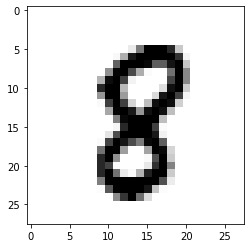

In [5]:
image = data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [6]:
std_data = StandardScaler().fit_transform(data_df.values)
print(std_data.shape)

(50000, 784)


In [7]:
# In order to not lose the original index we build a df
std_data_df = pd.DataFrame(std_data, index=data_df.index)

8


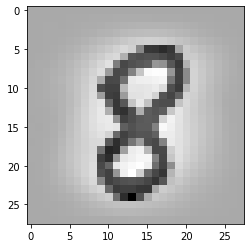

In [8]:
image_std = std_data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image_std[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [9]:
pca = PCA(n_components=2, random_state=42)

In [10]:
PC = pca.fit_transform(std_data_df.values)
print(PC)
PC_DF = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2'])

[[ 0.43466678 -6.27775277]
 [-7.33237616 -4.23769416]
 [-3.22298161 -1.71123499]
 ...
 [-2.38192588 -4.04834831]
 [ 6.18186448  2.57718602]
 [ 9.721533   16.99500202]]


In [11]:
PC_DF_label = pd.concat([PC_DF, pd.DataFrame(target, columns = ['true_label'])], axis = 1)
PC_DF_label

,principal component 1,principal component 2,true_label
0,0.434667,-6.277753,3
1,-7.332376,-4.237694,1
2,-3.222982,-1.711235,8
3,-7.133819,-2.152062,1
4,-0.547105,-1.339990,8
...,...,...,...
49995,-6.981863,4.743158,7
49996,2.692648,-7.054339,8
49997,-2.381926,-4.048348,2
49998,6.181864,2.577186,2


In [12]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#colors = ['r', 'g', 'b']
#for tg in target:
    #print(tg)
#    indicesToKeep = PC_DF_label['true_label'] == target
#    ax.scatter(
#        PC_DF_label.loc[indicesToKeep, 'principal component 1'], 
#        PC_DF_label.loc[indicesToKeep, 'principal component 2'], 
        #c = map(int, target), 
#    )
#ax.legend(target.values)

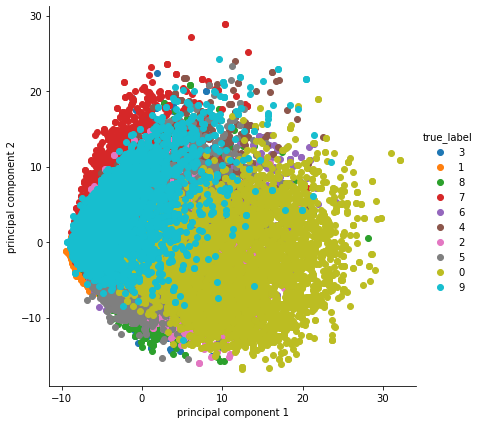

In [27]:
sns.FacetGrid(PC_DF_label, hue="true_label", height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()

In [14]:
# The cluster are really overlapped. We should use t-SNE for dimensionality reduction.
# But before that, let's try another normalization..
norm_data = MinMaxScaler().fit_transform(data_df.values)
print(norm_data.shape)

(50000, 784)


In [15]:
# In order to not lose the original index we build a df
norm_data_df = pd.DataFrame(norm_data, index=data_df.index)

8


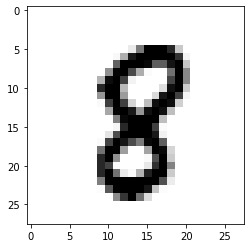

In [16]:
image_std = norm_data_df.values[2].reshape((-1, 28, 28))
plt.imshow(image_std[0],cmap=plt.cm.gray_r,interpolation="nearest")
print(target[2])

In [17]:
PC_norm = pca.fit_transform(norm_data_df.values)
print(PC_norm)
PC_DF_norm = pd.DataFrame(data = PC_norm, columns = ['principal component 1', 'principal component 2'])

[[ 0.8160469  -2.16557008]
 [-3.58603142 -3.25328238]
 [ 0.02512937 -0.55140583]
 ...
 [-0.49472544 -0.63871238]
 [ 1.51037132  0.40397881]
 [ 1.75720337  2.05790259]]


In [18]:
PC_DF_norm_label = pd.concat([PC_DF_norm, pd.DataFrame(target, columns = ['true_label'])], axis = 1)

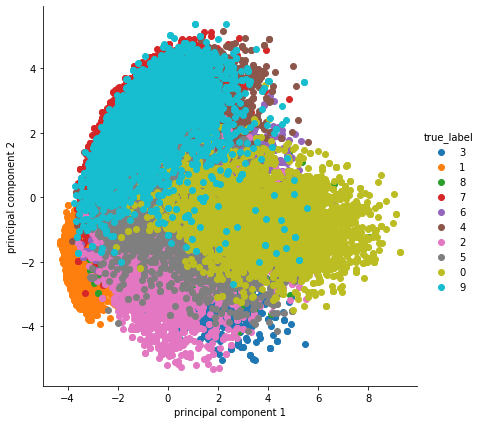

In [26]:
sns.FacetGrid(PC_DF_norm_label, hue="true_label", height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()

In [21]:
# Let's perform a 3D decomposition on normalized data:
pca3 = PCA(n_components=3, random_state=42)

In [22]:
PC_norm3 = pca3.fit_transform(norm_data_df.values)
print(PC_norm3)
PC_DF_norm3 = pd.DataFrame(data = PC_norm3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

[[ 0.81603788 -2.16519303 -0.31857838]
 [-3.58603418 -3.25314872  0.81069816]
 [ 0.02513481 -0.55168577 -0.40830612]
 ...
 [-0.49472829 -0.63877387  2.22190014]
 [ 1.51036137  0.40393559  0.89395163]
 [ 1.75719693  2.05787376 -1.52893629]]


In [29]:
PC_DF_norm3_label = pd.concat([PC_DF_norm3, pd.DataFrame(target, columns = ['true_label'])], axis = 1)
PC_DF_norm3_label

,principal component 1,principal component 2,principal component 3,true_label
0,0.816038,-2.165193,-0.318578,3
1,-3.586034,-3.253149,0.810698,1
2,0.025135,-0.551686,-0.408306,8
3,-3.467327,-2.322539,0.060830,1
4,-1.035947,1.099194,1.022406,8
...,...,...,...,...
49995,-2.454021,2.463931,-1.075539,7
49996,2.208813,-1.085480,-0.096751,8
49997,-0.494728,-0.638774,2.221900,2
49998,1.510361,0.403936,0.893952,2


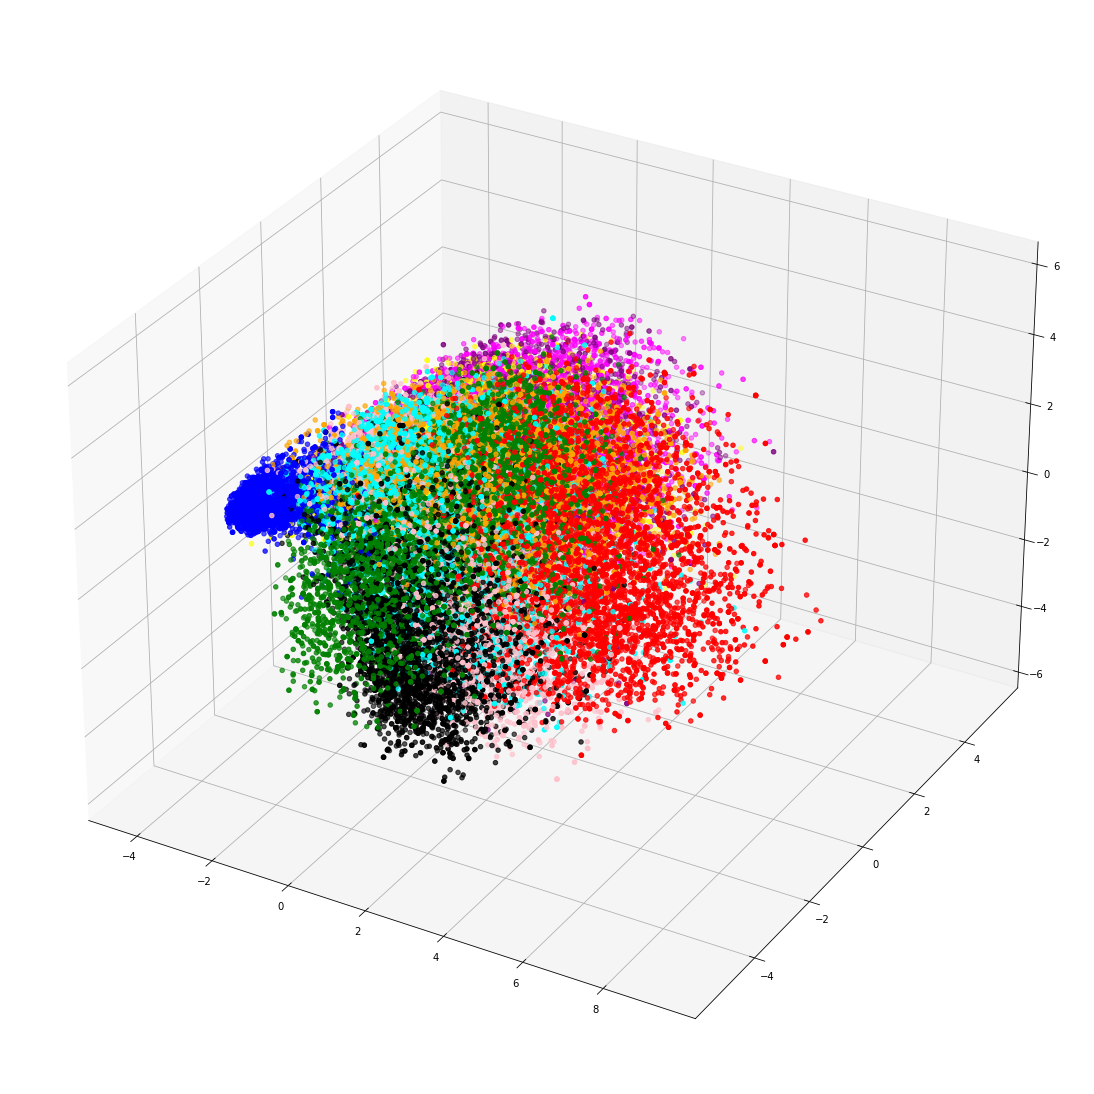

In [42]:
fig = plt.figure(figsize=(15,15))
#ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
x = PC_DF_norm3_label['principal component 1']
y = PC_DF_norm3_label['principal component 2']
z = PC_DF_norm3_label['principal component 3']
colors = {
    '0':'red', 
    '1':'blue', 
    '2':'green', 
    '3':'black',
    '4':'magenta',
    '5':'pink',
    '6':'orange',
    '7':'yellow',
    '8':'cyan',
    '9':'purple'
}

ax.scatter(x, y, z, c=PC_DF_norm3_label['true_label'].apply(lambda x: colors[x]))

plt.show()